# I/O: FITS and ASCII


### In this section we will:
- Learn how to use FITS files
    - Open a FITS file
    - Examine its header
    - Image data
    - Table data
    - Visualizing with `matplotlib`
- Learn how to use ASCII files
    - Open an ASCII file
    - Visualizing with `matplotlib`
    
#### For more information, see the Astropy documentation on [FITS](http://docs.astropy.org/en/stable/io/fits/) and [ASCII](http://docs.astropy.org/en/stable/io/ascii/index.html)
---


# Working with FITS files

In [1]:
from astropy.io import fits

The *open()* function in [astropy.io.fits](http://docs.astropy.org/en/stable/io/fits/index.html#) works with regular and compressed files.

Open a FITS file and look at the contents:

In [2]:
f = fits.open('j94f05bgq_flt.fits.gz')
f.info()
f.close()

Filename: j94f05bgq_flt.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     240   ()      
  1  SCI           1 ImageHDU       198   (1, 1)   float32   
  2  ERR           1 ImageHDU        69   ()      
  3  DQ            1 ImageHDU        69   ()      
  4  SCI           2 ImageHDU       184   (1, 1)   float32   
  5  ERR           2 ImageHDU        69   ()      
  6  DQ            2 ImageHDU        69   ()      


There is also a shortcut to look inside a FITS file before fully opening it:

In [3]:
fits.info('j94f05bgq_flt.fits.gz')

Filename: j94f05bgq_flt.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     240   ()      
  1  SCI           1 ImageHDU       198   (1, 1)   float32   
  2  ERR           1 ImageHDU        69   ()      
  3  DQ            1 ImageHDU        69   ()      
  4  SCI           2 ImageHDU       184   (1, 1)   float32   
  5  ERR           2 ImageHDU        69   ()      
  6  DQ            2 ImageHDU        69   ()      


In [4]:
type(f)

astropy.io.fits.hdu.hdulist.HDUList

FITS file objects, `HDUList`s,  are like lists. Individual HDUs are indexed like lists:

In [5]:
f[1]

or using a (EXTNAME, EXTVER) tuple.

In [6]:
f[("SCI", 1)]

## Working with headers

Headers are similar to python dictionaries.
Look at a header, modify an existing keyword and add a new card.

In [7]:
with fits.open('j94f05bgq_flt.fits.gz', mode='update') as f:
    print("crpix1: ", f[1].header['crpix1'])
    f[1].header['crpix1'] = 12  # Reassign the keyword
    print("Updated crpix1 :", f[1].header['crpix1'])

crpix1:  12
Updated crpix1 : 12


Opening a FITS file using the Python *with* statement
ensures that the file is closed without explicitely doing so.

There are several ways to add a new card.

Note: Attempting to access a non-existing keyword raises a *KeyError*.

In [8]:
f[1].header['observer'] = "Edwin Hubble"
    
# Assigning a tuple to a keyword splits
# the tuple into a keyword value and comment.
    
f[1].header['NOBS'] = (2, "Number of observing nights")
print("observer:", f[1].header['observer'])
print(f[1].header.comments['NOBS'], f[1].header['NOBS'])

observer: Edwin Hubble
Number of observing nights 2


To delete a keyword/card use the python *del* operator.

Again a *KeyError* is raised if the keyword is not in the header.

In [9]:
del f[1].header['NOBS']
del f[1].header['observer']

Comment and history cards are added as regular keywords. In this case a new card is always created.

In [10]:
with fits.open('j94f05bgq_flt.fits.gz', mode='update') as f:
    f[1].header["history"] = "New history card."
    f[1].header["comment"] = "This is a 47 Tuc observation with HST"
    f[1].header["comment"] = "I'd like to observe it with JWST."
    f[1].header['comment']
    print(f[1].header['comment'])

This is a 47 Tuc observation with HST
I'd like to observe it with JWST.
This is a 47 Tuc observation with HST
I'd like to observe it with JWST.
This is a 47 Tuc observation with HST
I'd like to observe it with JWST.


## Working with image data

In [11]:
f = fits.open('pix.fits.gz')
f.info()

Filename: pix.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      53   (512, 512)   int16   


An image is a numpy array saved as the data part of an HDU.

In [12]:
scidata = f[0].data
print(scidata.shape)
print(scidata.dtype)

(512, 512)
>i2


*scidata* is a pointer to the data array of the HDU and if it changes, the data in the HDU changes as well.

In [13]:
# All operations available to NDArray are applicable to the fits data array.
scidata[2:10, 3:7].mean()

38.375

`astropy.io.fits` provides convenience functions to operate on FITS files. These are good for interactive and quick lookup use. It is recommended to use the object-oriented interface for programming (creating a FITS object that you operate on).

In [14]:
# Get the data from an HDU 
data = fits.getdata('pix.fits.gz')
print("min, max: ", data.min(), data.max())

min, max:  -1 19936


In [15]:
# Get a keyword value
wcsaxes = fits.getval('j94f05bgq_flt.fits.gz', keyword="WCSAXES", ext=1)
print("wcsaxes:", wcsaxes)

wcsaxes: 2


In [16]:
# Set a keyword value
fits.setval("j94f05bgq_flt.fits.gz", keyword="observer", value="Edwin Hubble")

print("OBSERVER: ", fits.getval("j94f05bgq_flt.fits.gz", keyword="OBSERVER"))

OBSERVER:  Edwin Hubble


In [17]:
# Remove a keyword from a header
fits.delval("j94f05bgq_flt.fits.gz", keyword="OBSERVER")

### Visualizing with `matplotlib`

In [18]:
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

%matplotlib inline

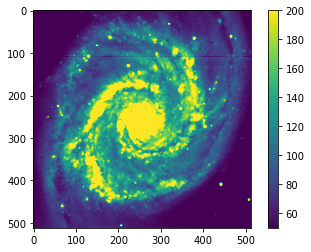

In [19]:
plt.imshow(scidata, vmin=50, vmax=200)
plt.colorbar()

For astronomical images, you often want the image scaling to be logarithmic. You can do this a number of ways, but the recommended was is to define the `norm` argument to be `matplotlib.colors.LogNorm()`.

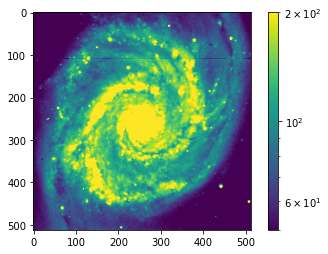

In [20]:
plt.imshow(scidata, vmin=50, vmax=200, norm=LogNorm())
plt.colorbar()

`matplotlib` has a number of built-in color maps that can be used to represent data. See all the options [on the `matplotlib` website](https://matplotlib.org/examples/color/colormaps_reference.html). 

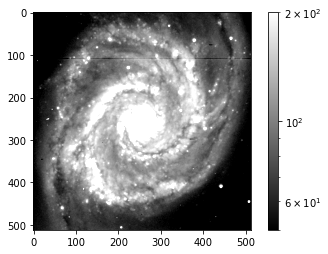

In [21]:
plt.imshow(scidata, vmin=50, vmax=200, norm=LogNorm(), cmap='gray')
plt.colorbar()

## Working with FITS tables

**Note**: The recommended method to read and write a single FITS table is using the [Unified I/O read/write interface](http://docs.astropy.org/en/stable/io/unified.html#table-io-fits):

    from astropy.table import Table
    t = Table.read('data.fits')

However, here we show an example of using [astropy.io.fits](http://docs.astropy.org/en/stable/io/fits/index.html#) as there exists a lot of legacy code which uses it.

In [22]:
from astropy.utils.data import download_file

In [27]:
table_filename = download_file( 'http://data.astropy.org/tutorials/FITS-tables/chandra_events.fits', cache=True )

In [30]:
hdu_list = fits.open(table_filename)
# hdu_list = fits.open('table.fits')
hdu_list.info()

Filename: C:\Users\pj\.astropy\cache\download\py3\26e9900d731d08997d99ada3973f4592
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      30   ()      
  1  EVENTS        1 BinTableHDU    890   483964R x 19C   [1D, 1I, 1I, 1J, 1I, 1I, 1I, 1I, 1E, 1E, 1E, 1E, 1J, 1J, 1E, 1J, 1I, 1I, 32X]   
  2  GTI           3 BinTableHDU     28   1R x 2C   [1D, 1D]   
  3  GTI           2 BinTableHDU     28   1R x 2C   [1D, 1D]   
  4  GTI           1 BinTableHDU     28   1R x 2C   [1D, 1D]   
  5  GTI           0 BinTableHDU     28   1R x 2C   [1D, 1D]   
  6  GTI           6 BinTableHDU     28   1R x 2C   [1D, 1D]   


In [31]:
table_data = hdu_list[1].data
print("Column names: \n", table_data.names)

print("\nRow 1: \n", table_data[1])

print("\nNumber of rows: \n", len(table_data))

Column names: 
 ['time', 'ccd_id', 'node_id', 'expno', 'chipx', 'chipy', 'tdetx', 'tdety', 'detx', 'dety', 'x', 'y', 'pha', 'pha_ro', 'energy', 'pi', 'fltgrade', 'grade', 'status']

Row 1: 
 (238623220.9093583, 3, 1, 68, 437, 237, 4895, 3498, 4865.567, 4621.1826, 3662.1968, 4915.9336, 667, 629, 2621.1938, 180, 64, 2, array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False]))

Number of rows: 
 483964


### Visualizing with `matplotlib`
#### 1D Histogram

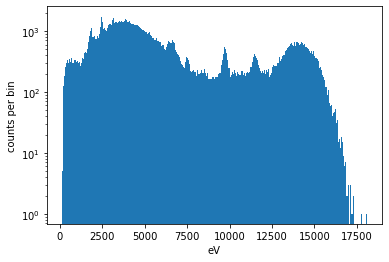

In [32]:
plt.hist(table_data['energy'], 1000, log=True)
plt.semilogy()
plt.xlabel("eV")
plt.ylabel("counts per bin")
plt.show()

#### 2D Histogram

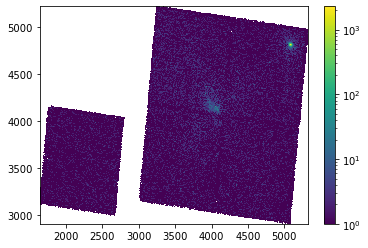

In [33]:
table_image, xedges, yedges, _ = plt.hist2d(table_data['x'], table_data['y'], (1000, 1000), norm=LogNorm())
plt.colorbar()

### Working with large files

The *open()* function supports a *memmap=True* argument that allows the array data of each HDU to be accessed with mmap, rather than being read into memory all at once. This is particularly useful for working with very large arrays that cannot fit entirely into physical memory.

<div class="alert alert-block alert-info">
<h3>Exercise:</h3>
<br>
Construct programmatically a FITS file with 1 image extension 
and save it to disk. Use a numpy array with random numbers as 
data.

Hints: 
- Use `fits.HDUList()` to create a FITS file.
- Use `fits.PrimaryHDU()` for the primary HDU and `fits.ImageHDU()` for the image HDU. 

To look at the documentation of a python object, type one of the following into a python or IPython terminal:

    >>> help(fits.ImageHDU)
    >>> fits.ImageHDU?

</div>

---
# Working with ASCII files

What if your data is in a text file? We've included `throughput.txt` as an example.

In [34]:
! cat throughput.txt

Detector throughput values
â€”â€”
Wavelength_microns Throughput
2.0004663860000003 1.7911368754631042e-12
2.002074478 2.5344376991635788e-12
2.00368257 3.3872207023255276e-12
2.005290662 2.891853959468528e-12
2.006898754 2.219181716269822e-12
2.008506846 1.461348755287244e-12
2.010114938 2.2400250647936047e-12
2.01172303 2.7626249579910593e-12
2.013331122 3.1941298893936973e-12
2.014939214 3.248116153140682e-12
2.016547306 3.0833946454723725e-12
2.018155398 2.729718275176398e-12
2.01976349 1.873552074019135e-12
2.021371582 1.0712976837162563e-12
2.022979674 1.3534956740469878e-13
2.0245877660000002 8.518620307802266e-14
2.026195858 2.8148502566051634e-13
2.027803949 4.228357574418601e-13
2.029412041 6.612645863690749e-13
2.031020133 7.514401379685323e-13
2.032628225 4.23278484454443e-13
2.034236317 5.202931756329573e-13
2.035844409 5.69565292015899e-13
2.037452501 5.9117725715628e-13
2.039060593 5.160344162034174e-13
2.040668685 6.313966884774502e-13
2.042276777 7.296552308564941e-13
2

Python has a built-in method for opening text files like ASCII files, but it's not too friendly. Let's see how it works:

In [35]:
with open('throughput.txt') as f:
    throughput_data = f.read()
throughput_data

'Detector throughput values\nâ€”â€”\nWavelength_microns Throughput\n2.0004663860000003 1.7911368754631042e-12\n2.002074478 2.5344376991635788e-12\n2.00368257 3.3872207023255276e-12\n2.005290662 2.891853959468528e-12\n2.006898754 2.219181716269822e-12\n2.008506846 1.461348755287244e-12\n2.010114938 2.2400250647936047e-12\n2.01172303 2.7626249579910593e-12\n2.013331122 3.1941298893936973e-12\n2.014939214 3.248116153140682e-12\n2.016547306 3.0833946454723725e-12\n2.018155398 2.729718275176398e-12\n2.01976349 1.873552074019135e-12\n2.021371582 1.0712976837162563e-12\n2.022979674 1.3534956740469878e-13\n2.0245877660000002 8.518620307802266e-14\n2.026195858 2.8148502566051634e-13\n2.027803949 4.228357574418601e-13\n2.029412041 6.612645863690749e-13\n2.031020133 7.514401379685323e-13\n2.032628225 4.23278484454443e-13\n2.034236317 5.202931756329573e-13\n2.035844409 5.69565292015899e-13\n2.037452501 5.9117725715628e-13\n2.039060593 5.160344162034174e-13\n2.040668685 6.313966884774502e-13\n2.042

Luckily, Astropy includes a package to handle ASCII files that immediately separates data into rows and columns, and loads it into an easy-to-use table:

In [36]:
from astropy.io import ascii

Since our file has a couple lines of comments at the top, we need to tell the reader to start reading the header at line 2 and the data at line 3.

In [37]:
throughput_data = ascii.read('throughput.txt', data_start=3, header_start=2)
throughput_data

Wavelength_microns,Throughput
float64,float64
2.0004663860000003,1.7911368754631042e-12
2.002074478,2.5344376991635788e-12
2.00368257,3.3872207023255276e-12
2.005290662,2.891853959468528e-12
2.006898754,2.219181716269822e-12
2.008506846,1.461348755287244e-12
2.010114938,2.2400250647936047e-12
2.01172303,2.7626249579910593e-12
2.013331122,3.1941298893936973e-12


We can also redefine the column names, if we want:

In [38]:
throughput_data = ascii.read('throughput.txt', data_start=3, header_start=2, 
                             names=['lambda', 'throughput'])
throughput_data

lambda,throughput
float64,float64
2.0004663860000003,1.7911368754631042e-12
2.002074478,2.5344376991635788e-12
2.00368257,3.3872207023255276e-12
2.005290662,2.891853959468528e-12
2.006898754,2.219181716269822e-12
2.008506846,1.461348755287244e-12
2.010114938,2.2400250647936047e-12
2.01172303,2.7626249579910593e-12
2.013331122,3.1941298893936973e-12


In [39]:
print("Column names: \n", throughput_data.colnames)
print("\nRow 1: \n", throughput_data[1])
print('\nColumn "lambda": \n', throughput_data.field("lambda"))
print("\nNumber of rows: \n", len(throughput_data))

Column names: 
 ['lambda', 'throughput']

Row 1: 
    lambda         throughput      
----------- ----------------------
2.002074478 2.5344376991635788e-12

Column "lambda": 
       lambda      
------------------
2.0004663860000003
       2.002074478
        2.00368257
       2.005290662
       2.006898754
       2.008506846
       2.010114938
        2.01172303
       2.013331122
       2.014939214
               ...
       5.086035135
       5.087386367
       5.088737598
       5.090088829
       5.091440061
       5.092791292
       5.094142524
 5.095493755000001
 5.096844987000001
       5.098196218
        5.09954745
Length = 2236 rows

Number of rows: 
 2236


Astropy's ASCII module can read files with a variety of formats and extensions, including comma-separated (CSV), tab-delimited, fixed-width, HTML, reStructuredText, and more. See the [Astropy docs](http://docs.astropy.org/en/stable/io/ascii/#supported-formats) for a complete list.

### Visualizing with `matplotlib`

Text(0, 0.5, 'Throughput')

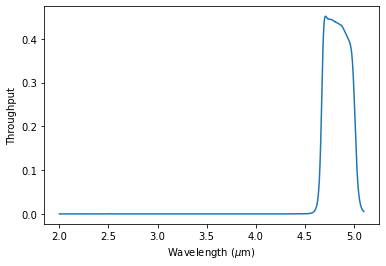

In [40]:
plt.plot(throughput_data['lambda'], throughput_data['throughput'])
plt.xlabel('Wavelength ($\mu$m)')
plt.ylabel('Throughput')